## importing necessary libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split



from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


In [2]:
df=pd.read_csv('Rome_1706413.csv')
df.head()

,acct_doc_header_id,company_id,doc_number,doc_number_norm,business_code,create_year,document_line_number,document_type,cust_number,cust_number_norm,...,debit_credit_status,payment_method,document_create_date.1,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,dispute_amount
0,538531572,60,38508548,38508548,Piat8,NaN,NaN,RI,219001,219001,...,NaN,NaN,NaN,4712.85,538531572,4712.85,4712.85,4,64,NaN
1,538021535,60,37717934,37717934,ABes3,NaN,NaN,RI,226547,226547,...,NaN,NaN,NaN,16135.84,538021535,16135.84,16135.84,7,67,NaN
2,533610329,60,31221060,31221060,cvrp1,NaN,NaN,RI,228089,228089,...,NaN,NaN,NaN,609.69,533610329,609.69,609.69,-2,58,NaN
3,533861532,60,31618228,31618228,deer10,NaN,NaN,RI,228078,228078,...,NaN,NaN,NaN,6435.82,533861532,6435.82,6435.82,0,60,NaN
4,535303724,60,32824039,32824039,avto3,NaN,NaN,RI,219000,219000,...,NaN,NaN,NaN,1599.98,535303724,1599.98,1599.98,8,68,NaN


## Splitting the data into Train and final test set as per instructions

In [3]:
df1=df[df.clear_date_norm.notnull()]
y=df[df.clear_date_norm.isnull()]

In [4]:
df1.head()

,acct_doc_header_id,company_id,doc_number,doc_number_norm,business_code,create_year,document_line_number,document_type,cust_number,cust_number_norm,...,debit_credit_status,payment_method,document_create_date.1,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,dispute_amount
0,538531572,60,38508548,38508548,Piat8,NaN,NaN,RI,219001,219001,...,NaN,NaN,NaN,4712.85,538531572,4712.85,4712.85,4,64,NaN
1,538021535,60,37717934,37717934,ABes3,NaN,NaN,RI,226547,226547,...,NaN,NaN,NaN,16135.84,538021535,16135.84,16135.84,7,67,NaN
2,533610329,60,31221060,31221060,cvrp1,NaN,NaN,RI,228089,228089,...,NaN,NaN,NaN,609.69,533610329,609.69,609.69,-2,58,NaN
3,533861532,60,31618228,31618228,deer10,NaN,NaN,RI,228078,228078,...,NaN,NaN,NaN,6435.82,533861532,6435.82,6435.82,0,60,NaN
4,535303724,60,32824039,32824039,avto3,NaN,NaN,RI,219000,219000,...,NaN,NaN,NaN,1599.98,535303724,1599.98,1599.98,8,68,NaN


# Preprocessing
Droping all the null columns and finding missing data

In [5]:
#Counting all the null columns 
c=0
nan_cols = [i for i in df1.columns if df1[i].isnull().all()]
for i in nan_cols:
    c=c+1
print("Total count of columns with all null values:",+c,end='\n')
print(nan_cols)

Total count of columns with all null values: 18
['create_year', 'document_line_number', 'division', 'posting_date', 'posting_date_norm', 'posting_id', 'due_in_date', 'due_in_date_norm', 'order_create_date', 'order_date_norm', 'area_business', 'shipping_to', 'reason_code', 'discount_due_date_norm', 'debit_credit_status', 'payment_method', 'document_create_date.1', 'dispute_amount']


In [6]:
#removing all the 18 null columns
df1=df1.dropna(axis=1,how='all')

In [7]:
# to visualise the percentage of
# missing values for each variable
df1.isnull().mean()

acct_doc_header_id           0.000
company_id                   0.000
doc_number                   0.000
doc_number_norm              0.000
business_code                0.000
document_type                0.000
cust_number                  0.000
cust_number_norm             0.000
customer_map_id              0.000
name_customer                0.000
document_create_date         0.000
document_create_date_norm    0.000
invoice_id                   0.000
invoice_id_norm              0.000
baseline_create_date         0.789
invoice_date_norm            0.789
total_open_amount            0.000
total_open_amount_norm       0.000
cust_payment_terms           0.000
shipping_date                0.789
clear_date                   0.000
clear_date_norm              0.000
is_open_invoice              0.000
invoice_currency             0.000
doc_id                       0.000
actual_outstanding_amount    0.000
payment_amount               0.000
days_past_duedate            0.000
age_invoice         

### Note
Few columns has almost 78% of missing data so removing that columns wont effect 
the results much.

In [8]:
df1=df1.drop(columns=['shipping_date','baseline_create_date','invoice_date_norm'])

### Droping one of the columns out of the two similar columns

In [9]:
comparison_column = np.where(df1["doc_number"] == df1["doc_number_norm"], True, False)
comp = np.where(df1["cust_number"] == df1["cust_number_norm"], True, False)
com = np.where(df1["total_open_amount"] == df1["total_open_amount_norm"], True, False)
co = np.where(df1["invoice_id"] == df1["invoice_id_norm"], True, False)
c1 = np.where(df1["clear_date"] == df1["clear_date_norm"], True, False)
#count is same as total rows so both has same values
true_count = sum(comparison_column)
print(true_count)
true_count = sum(comp)
print(true_count)
true_count = sum(com)
print(true_count)
true_count = sum(co)
print(true_count)
true_count=sum(c1)
print(true_count)

45000
45000
45000
45000
45000


In [10]:
df1=df1.drop(['doc_number_norm','total_open_amount_norm','cust_number_norm','document_create_date_norm','clear_date_norm','invoice_id_norm'],axis=1)
df1.head()

,acct_doc_header_id,company_id,doc_number,business_code,document_type,cust_number,customer_map_id,name_customer,document_create_date,invoice_id,total_open_amount,cust_payment_terms,clear_date,is_open_invoice,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice
0,538531572,60,38508548,Piat8,RI,219001,-1,PiperChat,2018-05-25,38508548,0.0,60,2018-07-28,0,4712.85,538531572,4712.85,4712.85,4,64
1,538021535,60,37717934,ABes3,RI,226547,-1,ABC Softwares,2018-04-27,37717934,0.0,60,2018-07-03,0,16135.84,538021535,16135.84,16135.84,7,67
2,533610329,60,31221060,cvrp1,RI,228089,-1,cvMaker corp,2017-09-20,31221060,0.0,60,2017-11-17,0,609.69,533610329,609.69,609.69,-2,58
3,533861532,60,31618228,deer10,RI,228078,-1,deep scraper,2017-10-03,31618228,0.0,60,2017-12-02,0,6435.82,533861532,6435.82,6435.82,0,60
4,535303724,60,32824039,avto3,RI,219000,-1,aviato,2017-11-08,32824039,0.0,60,2018-01-15,0,1599.98,535303724,1599.98,1599.98,8,68


## Droping coloumns having same values through out as they have no impact on the results


In [11]:
print(len(df1.customer_map_id.unique()))
print(len(df1.document_type.unique()))
print(len(df1.company_id.unique()))

1
1
1


In [12]:
df1=df1.drop(['customer_map_id','document_type','company_id'],axis=1)

# Feature engineering

In [13]:
df1.dtypes

acct_doc_header_id             int64
doc_number                     int64
business_code                 object
cust_number                    int64
name_customer                 object
document_create_date          object
invoice_id                     int64
total_open_amount            float64
cust_payment_terms             int64
clear_date                    object
is_open_invoice                int64
invoice_currency             float64
doc_id                         int64
actual_outstanding_amount    float64
payment_amount               float64
days_past_duedate              int64
age_invoice                    int64
dtype: object

#### Changing the data types of few necesarry variables

In [14]:
df1['document_create_date'] = pd.to_datetime(df1.document_create_date)
df1['clear_date'] = pd.to_datetime(df1.clear_date)

### cust_number is allocated unique to ecah of tthe unique business code so cust number is removed

In [15]:
df1=df1.drop(['cust_number'],axis=1)

### Applying Label encoder

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencode=LabelEncoder()
df1['business_code'] = labelencode.fit_transform(df1['business_code'])
df1

,acct_doc_header_id,doc_number,business_code,name_customer,document_create_date,invoice_id,total_open_amount,cust_payment_terms,clear_date,is_open_invoice,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice
0,538531572,38508548,13,PiperChat,2018-05-25,38508548,0.0,60,2018-07-28,0,4712.85,538531572,4712.85,4712.85,4,64
1,538021535,37717934,1,ABC Softwares,2018-04-27,37717934,0.0,60,2018-07-03,0,16135.84,538021535,16135.84,16135.84,7,67
2,533610329,31221060,28,cvMaker corp,2017-09-20,31221060,0.0,60,2017-11-17,0,609.69,533610329,609.69,609.69,-2,58
3,533861532,31618228,29,deep scraper,2017-10-03,31618228,0.0,60,2017-12-02,0,6435.82,533861532,6435.82,6435.82,0,60
4,535303724,32824039,24,aviato,2017-11-08,32824039,0.0,60,2018-01-15,0,1599.98,535303724,1599.98,1599.98,8,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,543520868,46978344,39,nucleus,2019-03-08,46978344,0.0,60,2019-05-14,0,5079.97,543520868,5079.97,5079.97,7,67
49996,533482058,30897838,48,walmart,2017-09-07,30897838,0.0,60,2017-11-07,0,2607.98,533482058,2607.98,2607.98,1,61
49997,540836426,41267305,45,see food,2018-09-19,41267305,0.0,67,2018-11-25,0,2218.24,540836426,2218.24,2218.24,0,67
49998,538585928,38572575,41,pied piper,2018-05-29,38572575,0.0,60,2018-07-28,0,12804.61,538585928,12804.61,12804.61,0,60


In [17]:
y['business_code'] = labelencode.fit_transform(y['business_code'])

c:\users\brai-\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Sorting the dataset according to clear date and removing duplicates of documnet number while keeping its first appearence

In [18]:
df1=df1.sort_values(by=['clear_date'])
df1=df1.drop_duplicates(subset ="doc_number", 
                     keep = "first") 

In [19]:
import pylab 
import seaborn as sns
import scipy.stats as stats
sns.set(style="whitegrid")

### vizualing to check for any neccesary changes to be made to fit the model

In [20]:
def diagnostic_plots2(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

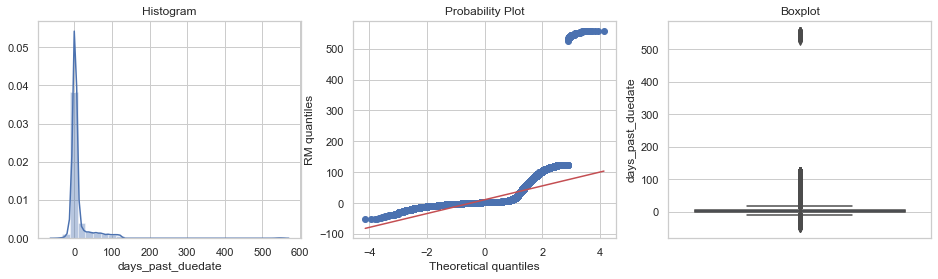

In [21]:
diagnostic_plots2(df1, 'days_past_duedate')

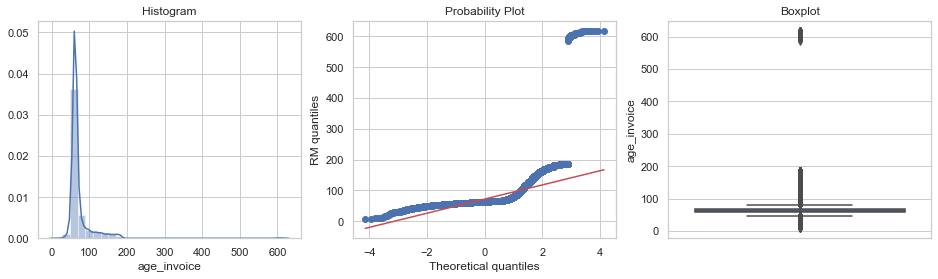

In [22]:
diagnostic_plots2(df1, 'age_invoice')

In [23]:
# function to find upper and lower boundaries
# for skewed distributed variables


def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [24]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for age invoice

upper_boundary, lower_boundary = find_skewed_boundaries(df1, 'age_invoice', 1.5)
upper_boundary, lower_boundary

(81.5, 45.5)

In [25]:
# lets look at the number and percentage of outliers
# for age invoice

print('total data: {}'.format(len(df1)))

print('data with invoice bigger than 81.5: {}'.format(
    len(df1[df1['age_invoice'] > upper_boundary])))
print()
print('% data with age invoice bigger than 81.5: {}'.format(
    len(df1[df1['age_invoice'] > upper_boundary])/len(df1)))

total data: 40010
data with invoice bigger than 81.5: 5962

% data with age invoice bigger than 81.5: 0.14901274681329668


In [26]:
# lets look at the number and percentage of outliers
# for age invoice

print('total data: {}'.format(len(df1)))

print('data with invoice lower than 45.5: {}'.format(
    len(df1[df1['age_invoice'] < lower_boundary])))
print()
print('% data with age invoice lower than 45.5: {}'.format(
    len(df1[df1['age_invoice'] < lower_boundary])/len(df1)))

total data: 40010
data with invoice lower than 45.5: 496

% data with age invoice lower than 45.5: 0.012396900774806298


In [27]:
df1.drop(df1[df1['age_invoice'] > 81.5].index, inplace = True)

In [28]:
df1.drop(df1[df1['age_invoice'] < 45.5].index, inplace = True)

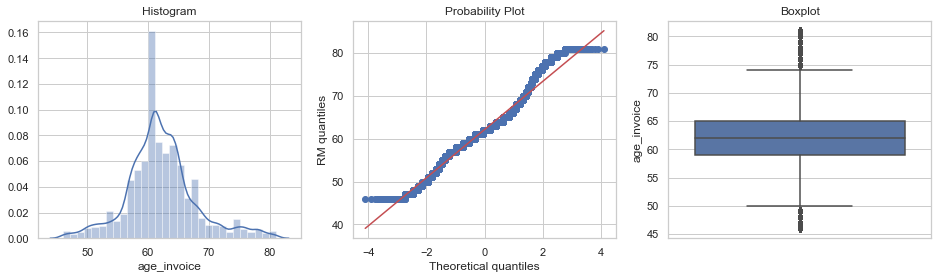

In [29]:
diagnostic_plots2(df1, 'age_invoice')

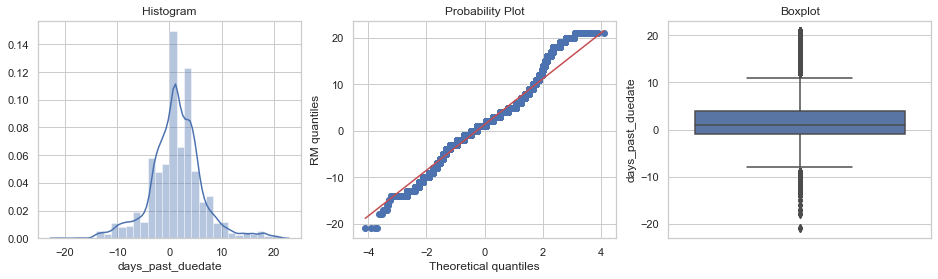

In [30]:
diagnostic_plots2(df1, 'days_past_duedate')

### Removing qutliers of age_invoice has made both the age_invoice and days_past_duedate having noram distribution which is better for the mdoels prediction

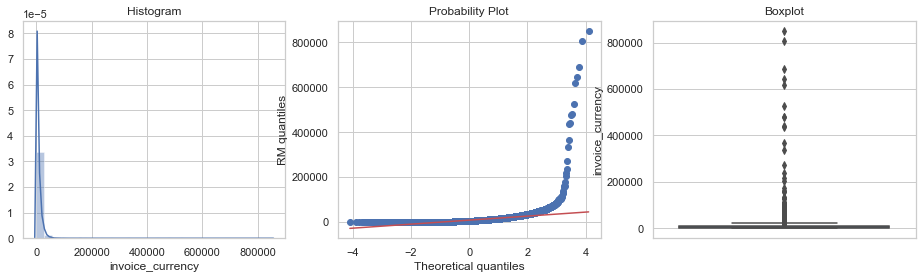

In [31]:
diagnostic_plots2(df1, 'invoice_currency')

#### Cross validation 

In [32]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [33]:
x_train, x_test, Y_train, Y_test = train_test_split(df1.drop(labels=['acct_doc_header_id','payment_amount','name_customer','document_create_date','clear_date'], axis=1)
                                                    ,df1['payment_amount'],test_size=0.3,random_state=0)

x_train.shape, x_test.shape

((23486, 11), (10066, 11))

In [34]:
cross_val_score(RandomForestRegressor(n_estimators=100, random_state=39, max_depth=4),x_train,Y_train).mean()

0.9345378437687872

In [35]:
cross_val_score(RandomForestRegressor(n_estimators=300, random_state=39, max_depth=4),x_train,Y_train).mean()

0.9358608136475155

In [36]:
cross_val_score(RandomForestRegressor(n_estimators=200, random_state=39, max_depth=4),x_train,Y_train).mean()

0.9350413708568466

##### this changing of parameter is called parameter tuning to check which delivers the best one

In [37]:
cross_val_score(AdaBoostRegressor(random_state=0, n_estimators=100),x_train,Y_train).mean()

0.8185722324493202

In [38]:
cross_val_score(svm.SVR(),x_train,Y_train).mean()

-0.06828066242167155

In [40]:
cross_val_score(Ridge(alpha=1.0),x_train,Y_train).mean()

c:\users\brai-\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.16073e-19): result may not be accurate.
  overwrite_a=True).T
c:\users\brai-\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.16323e-19): result may not be accurate.
  overwrite_a=True).T
c:\users\brai-\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.17791e-19): result may not be accurate.
  overwrite_a=True).T


0.9621675009279309

##### as from above the random forest shows the best results so model will be built on randomFroestRegessor with the given parameters which suited the best in cross vaalidation score and ridge is not used as it showed some neagtive values in the predicted payment amount

## Featuring Selection Technique

### Removing correleated features

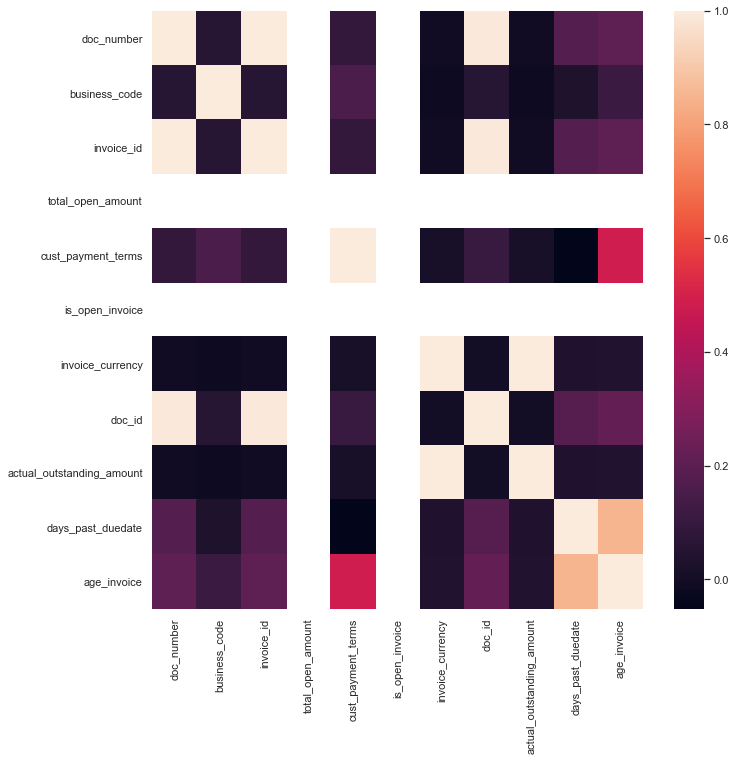

In [41]:
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

#### Darker the area more the correleation

In [42]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  4


In [43]:
#droping corelated features
x_train.drop(labels=corr_features, axis=1, inplace=True)
x_test.drop(labels=corr_features, axis=1, inplace=True)

x_train.shape, x_test.shape

((23486, 7), (10066, 7))

# SequentialFeatureSelector

In [44]:
sfs1 = SFS(RandomForestRegressor(n_jobs=4), 
           k_features=7, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=2)

sfs1 = sfs1.fit(np.array(x_train), Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.0s finished

[2020-05-05 22:20:27] Features: 1/7 -- score: 0.9464388970627116[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.6s finished

[2020-05-05 22:20:37] Features: 2/7 -- score: 0.9603638790574158[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.0s finished

[2020-05-05 22:20:46] Features: 3/7 -- score: 0.9620304976897834[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [45]:
selected_feat= x_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['doc_number', 'business_code', 'total_open_amount',
       'cust_payment_terms', 'is_open_invoice', 'invoice_currency',
       'days_past_duedate'],
      dtype='object')

### Exhaustive feature selection

In [ ]:
efs1 = EFS(RandomForestRegressor(n_jobs=4, random_state=0), 
           min_features=3,
           max_features=7, 
           scoring='r2',
           print_progress=True,
           cv=2)

efs1 = efs1.fit(np.array(x_train[x_train.columns[0:8]].fillna(0)), Y_train)

In [ ]:
selected_feature= x_train.columns[list(efs1.best_idx_)]
selected_feature

## applying randomforestRegessor

In [51]:
def run_randomForests(x_train, x_test, Y_train, Y_test):
    rf = RandomForestRegressor(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(x_train, Y_train)
    print('Train set')
    pred = rf.predict(x_train)
    print('Random Forests r2_score: {}'.format(r2_score(Y_train, pred[:])))
    print('Test set')
    pred = rf.predict(x_test) 
    print('Random Forests r2_score: {}'.format(r2_score(Y_test, pred[:])))

In [52]:
run_randomForests(x_train[selected_feat].fillna(0),
                  x_test[selected_feat].fillna(0),
                  Y_train, Y_test)

Train set
Random Forests r2_score: 0.9692158393669708
Test set
Random Forests r2_score: 0.9611780025006467


In [46]:
rf = RandomForestRegressor(n_estimators=200, random_state=39, max_depth=4)
rf.fit(x_train[selected_feat].fillna(0), Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=39, verbose=0, warm_start=False)

In [47]:
pred0=rf.predict(x_train[selected_feat].fillna(0))
pred1=rf.predict(x_test[selected_feat].fillna(0))

### accuracy check

In [50]:
print('Random Forests r2_score: {}'.format(r2_score(Y_test, pred1[:])))


Random Forests r2_score: 0.9611780025006467


#### vizualizing the sets and prediction outcome

Text(0, 0.5, 'payment')

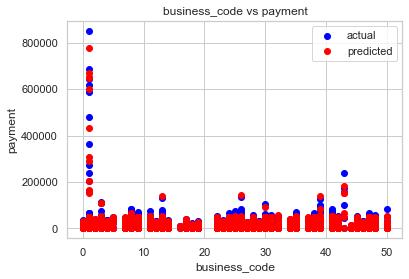

In [53]:
plt.scatter(x_train['business_code'],Y_train,color='blue')
plt.scatter(x_train['business_code'],pred0,color='red')
plt.title('business_code vs payment')
plt.xlabel('business_code')
plt.legend({'predicted','actual'})
plt.ylabel('payment')

#### showing a representation of actual first paymnent done to predicted first payment done with respect to business code

In [54]:
#filling the features to predict
y1=y[selected_feat].fillna(0)

In [55]:
pred2= rf.predict(y1)

In [56]:
df5=y[['doc_number','business_code','days_past_duedate','invoice_currency','total_open_amount']]

In [57]:
df5['pred_first_amount']=pred2

c:\users\brai-\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
df5

,doc_number,business_code,days_past_duedate,invoice_currency,total_open_amount,pred_first_amount
42505,51501891,24,-55,24401.49,24401.49,21119.271615
42506,51116066,41,-41,2877.69,2877.69,3859.971604
42507,51041047,38,-46,2884.55,2884.55,3859.971604
42508,50042257,26,-20,22585.07,22585.07,19330.719159
42509,50003282,34,-4,60.82,60.82,1068.024209
...,...,...,...,...,...,...
47500,50652518,38,-32,3022.24,3022.24,4114.803689
47501,30389300,3,18,936.97,936.97,1068.024209
47502,50692803,2,-26,15355.80,15355.80,14574.439552
47503,50998121,6,-38,24168.86,24168.86,20862.453747


In [59]:
df5.loc[df5['pred_first_amount'] > df5['total_open_amount'] , 'pred_first_amount'] = df5['total_open_amount']

c:\users\brai-\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [60]:
df5

,doc_number,business_code,days_past_duedate,invoice_currency,total_open_amount,pred_first_amount
42505,51501891,24,-55,24401.49,24401.49,21119.271615
42506,51116066,41,-41,2877.69,2877.69,2877.690000
42507,51041047,38,-46,2884.55,2884.55,2884.550000
42508,50042257,26,-20,22585.07,22585.07,19330.719159
42509,50003282,34,-4,60.82,60.82,60.820000
...,...,...,...,...,...,...
47500,50652518,38,-32,3022.24,3022.24,3022.240000
47501,30389300,3,18,936.97,936.97,936.970000
47502,50692803,2,-26,15355.80,15355.80,14574.439552
47503,50998121,6,-38,24168.86,24168.86,20862.453747


In [61]:
df5.loc[df5['pred_first_amount'] < df5['total_open_amount'] , 'invoice_type'] = 'partailly paid'
df5.loc[df5['pred_first_amount'] == df5['total_open_amount'] , 'invoice_type'] = 'fully paid'

c:\users\brai-\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\brai-\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [62]:
df5

,doc_number,business_code,days_past_duedate,invoice_currency,total_open_amount,pred_first_amount,invoice_type
42505,51501891,24,-55,24401.49,24401.49,21119.271615,partailly paid
42506,51116066,41,-41,2877.69,2877.69,2877.690000,fully paid
42507,51041047,38,-46,2884.55,2884.55,2884.550000,fully paid
42508,50042257,26,-20,22585.07,22585.07,19330.719159,partailly paid
42509,50003282,34,-4,60.82,60.82,60.820000,fully paid
...,...,...,...,...,...,...,...
47500,50652518,38,-32,3022.24,3022.24,3022.240000,fully paid
47501,30389300,3,18,936.97,936.97,936.970000,fully paid
47502,50692803,2,-26,15355.80,15355.80,14574.439552,partailly paid
47503,50998121,6,-38,24168.86,24168.86,20862.453747,partailly paid
